# Part I 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis as NA

In [7]:
def forward_euler(f, y0, h, tmax):
    """Forward Euler method to solve ordinary differential equations. Given a starting point y0 and 
    function f such that Y = f(Y, Y', Y'',..., Y^(k)) and time step h\nReturns:\n
    Array Y=[Y(t0), Y(t0+h), ..., Y(tmax)]"""
    Y = np.empty(shape =(len(y0),tmax))
    Y[:,0] = y0
    for i in range(tmax-1):
        Y[:,i+1] = Y[:,i]+h*f(Y[:,i])
    return Y
def runge_kutta_4(f, y0, h, tmax):
    """Fourth order runge kutta method to solve ordinary differential equations. Given a starting point y0 and 
    function f such that Y = f(Y, Y', Y'',..., Y^(k)) and time step h\nReturns:\n
    Array Y=[Y(t0), Y(t0+h), ..., Y(tmax)]"""
    Y = np.empty(shape = (len(y0),tmax))
    Y[:,0] = y0
    for i in range(tmax-1):
        k1 = f(Y[:,i])
        k2 = f(Y[:,i] + h/2*k1)
        k3 = f(Y[:,i] + h/2*k2)
        k4 = f(Y[:,i] + h*k3)
        Y[:,i+1] = Y[:,i] + h/6*(k1+k2+k3+k4)
    return Y

In [9]:
def ODE_func(a, p, e, r):
    """Returns system of ODE's which describe the spread of HIV. Parameters a describe contacts, e describes
    blood transfusions and r the effects of death."""
    def ODE_funcx(x):
        F0 = a[0]*x[0]*(p[0]-x[0])+a[1]*x[1]*(p[0]-x[0])-r*x[0]
        F1 = a[2]*x[0]*(p[1]-x[1])+a[3]*x[1]*(p[1]-x[1])+a[4]*x[2]*(p[1]-x[1])-r*x[1]
        F2 = a[5]*x[1]*(p[2]-x[2])+a[6]*x[3]*(p[2]-x[2])-r*x[2]
        F3 = a[7]*x[2]*(p[3]-x[3])+e*x[0]*(r-x[3])-r*x[3]
        return np.array([F0, F1, F2, F3])
    return ODE_funcx

In [48]:
y0 = np.array([.01, 0,0,0])
a = np.array([10., 5, 5, 1, 1, 1, 1, 1])
p = np.array([5., 5, 100, 100])
h, num_steps = 1e-4, 3000
Y_fe = forward_euler(ODE_func(a,p,0,0), y0, h, num_steps)/p[:,NA]*100
Y_rg = runge_kutta_4(ODE_func(a,p,0,0), y0, h, num_steps)/p[:,NA]*100

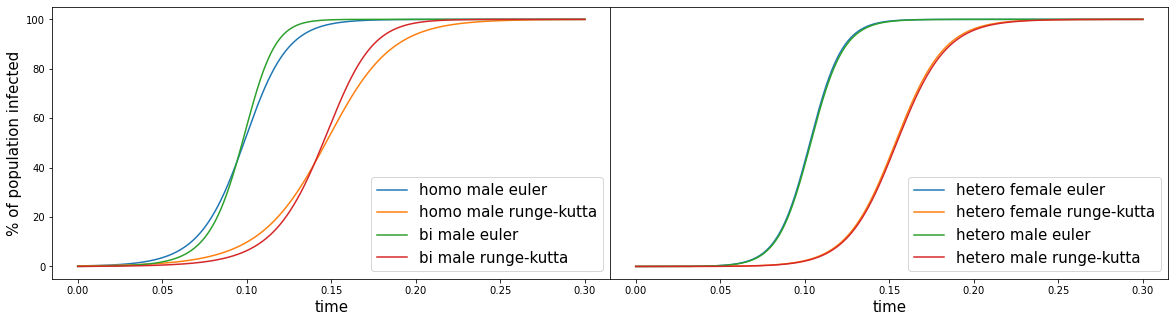

In [78]:
t = np.linspace(0,h*num_steps,num_steps)
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(t, Y_fe[0,:], label = "homo male euler")
ax[0].plot(t, Y_rg[0,:], label = "homo male runge-kutta")
ax[0].plot(t, Y_fe[1,:], label = "bi male euler")
ax[0].plot(t, Y_rg[1,:], label = "bi male runge-kutta")
ax[1].plot(t, Y_fe[2,:], label = "hetero female euler")
ax[1].plot(t, Y_rg[2,:], label = "hetero female runge-kutta")
ax[1].plot(t, Y_fe[3,:], label = "hetero male euler")
ax[1].plot(t, Y_rg[3,:], label = "hetero male runge-kutta")
ax[0].legend(fontsize = 15), ax[1].legend(fontsize = 15)
ax[0].set_xlabel("time", fontsize = 15), ax[1].set_xlabel("time", fontsize = 15)
ax[0].set_ylabel("% of population infected", fontsize = 15)
plt.subplots_adjust(wspace=0)
ax[1].set_yticks([])
plt.show()

In [51]:
e = np.logspace(-3,1,5)
Y_rg_bd = np.empty(shape = (len(y0), num_steps, len(e)))
for i in range(len(e)):
    Y_rg_bd[:,:,i] = runge_kutta_4(ODE_func(a,p,e[i],0), y0, h, num_steps)/p[:,NA]*100

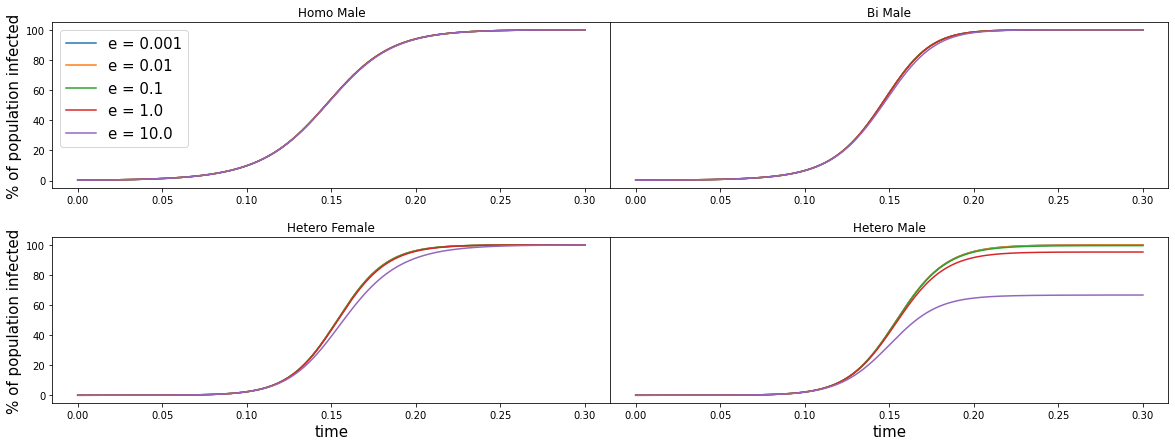

In [77]:
t = np.linspace(0,h*num_steps,num_steps)
fig, ax = plt.subplots(2,2, figsize = (20,7))
for i in range(len(e)):
    ax[0,0].plot(t, Y_rg_bd[0,:,i], label = "e = {}".format(e[i]))
    ax[0,0].legend(fontsize = 15), ax[0,0].set_title("Homo Male")
    ax[0,1].plot(t, Y_rg_bd[1,:,i]),  ax[0,1].set_title("Bi Male")
    ax[1,0].plot(t, Y_rg_bd[2,:,i]),  ax[1,0].set_title("Hetero Female")
    ax[1,1].plot(t, Y_rg_bd[3,:,i]), ax[1,1].set_title("Hetero Male")
ax[0,1].set_yticks([]), ax[1,1].set_yticks([])
ax[1,0].set_xlabel("time",fontsize=15), ax[1,1].set_xlabel("time",fontsize = 15),
plt.subplots_adjust(hspace=.3),plt.subplots_adjust(wspace=0)
ax[0,0].set_ylabel("% of population infected", fontsize = 15)
ax[1,0].set_ylabel("% of population infected", fontsize = 15)
plt.show()

In [87]:
num_steps = 3000
h = 1e-4
r = np.linspace(.005,10,5)
Y_rg_r = np.empty(shape = (len(y0), num_steps, len(r)))
for i in range(len(r)):
    Y_rg_r[:,:,i] = runge_kutta_4(ODE_func(a,p,0,r[i]), y0, h, num_steps)/p[:,NA]*100

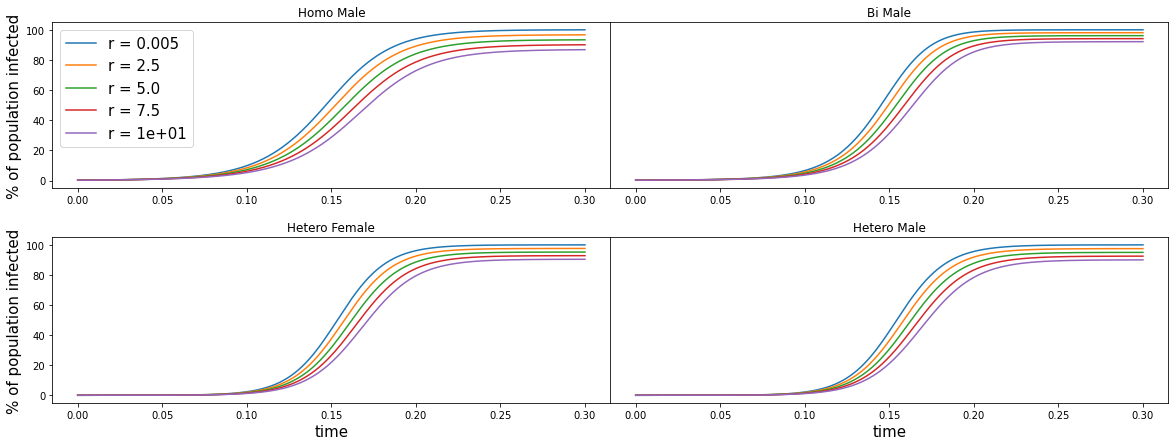

In [90]:
fig, ax = plt.subplots(2,2, figsize = (20,7))
for i in range(len(r)):
    ax[0,0].plot(t, Y_rg_r[0,:,i], label = "r = {:3.2}".format(r[i]))
    ax[0,0].legend(fontsize = 15), ax[0,0].set_title("Homo Male")
    ax[0,1].plot(t, Y_rg_r[1,:,i]),  ax[0,1].set_title("Bi Male")
    ax[1,0].plot(t, Y_rg_r[2,:,i]),  ax[1,0].set_title("Hetero Female")
    ax[1,1].plot(t, Y_rg_r[3,:,i]), ax[1,1].set_title("Hetero Male")
ax[0,1].set_yticks([]), ax[1,1].set_yticks([])
ax[1,0].set_xlabel("time",fontsize=15), ax[1,1].set_xlabel("time",fontsize = 15),
plt.subplots_adjust(hspace=.3),plt.subplots_adjust(wspace=0)
ax[0,0].set_ylabel("% of population infected", fontsize = 15)
ax[1,0].set_ylabel("% of population infected", fontsize = 15)
plt.show()

In [104]:
e = np.logspace(-3,1,5)
r = np.linspace(.005,10,5)
Y_rg_r = np.empty(shape = (len(y0), num_steps, len(r), len(e)))
for i in range(len(r)):
    for j in range(len(e)):
        Y_rg_r[:,:,i,j] = runge_kutta_4(ODE_func(a,p,e[j],r[i]), y0, h, num_steps)/p[:,NA]*100

In [124]:
Y_rg_r.shape
4*3000*25

300000

In [121]:
Y_mask = Y_rg_r > .99
np.where(Y_mask==True)[1].shape

(227156,)

In [127]:
np.where(Y_rg_r>.99)[1].shape

(227156,)

In [115]:
np.where(np.array([False, False, False,True])==True)[0][0]

2

# Part II 